In [1]:
import xpsi
from xpsi.global_imports import _c, _G, _dpr, gravradius, _csq, _km, _2pi, _keV, _k_B, _h, _h_keV, _c_cgs
k_B_over_keV = _k_B / _keV
from scipy.integrate import quad

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from custom_tools import CustomInstrumentJ1808, CustomBackground_BlackBody, CustomBackground_DiskBB, CustomInterstellar, get_T_in_log10_Kelvin, plot_2D_pulse, get_mids_from_edges, CustomSignal, SynthesiseData
from matplotlib import cm

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1


In [2]:
################################## INSTRUMENT #################################
channel_low = 10 # 20
channel_hi = 600 #600 #500 #300 commented numbers work
max_input = 2000 #2000 #1800 #1400

NICER103 = CustomInstrumentJ1808.from_response_files(ARF = '../model_data/instrument_data/J1808_NICER_103/ni2584010103mpu7_arf_aeff.txt',
                                                  RMF = '../model_data/instrument_data/J1808_NICER_103/ni2584010103mpu7_rmf_matrix.txt',
                                                  channel_edges = '../model_data/instrument_data/J1808_NICER_103/ni2584010103mpu7_rmf_energymap.txt',
                                                  channel_low=channel_low,
                                                  channel_hi=channel_hi,
                                                  max_input=max_input)

Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.


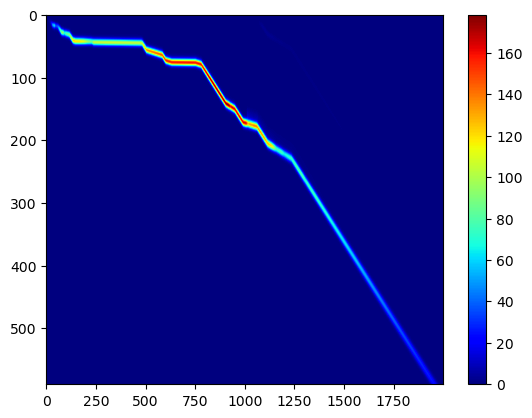

In [3]:
plt.imshow(NICER103.matrix, cmap='jet',aspect='auto')
plt.colorbar()


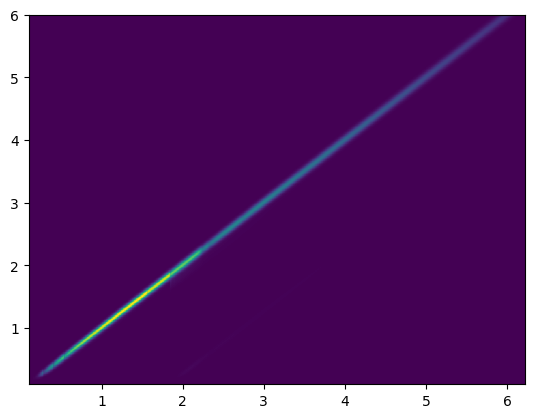

In [4]:
plt.pcolormesh(NICER103.energy_edges, NICER103.channel_edges, NICER103.matrix)

In [5]:
NICER2019 = CustomInstrumentJ1808.from_response_files(ARF = '../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_arf_aeff.txt',
                                                  RMF = '../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_rmf_matrix.txt',
                                                  channel_edges = '../model_data/instrument_data/J1808_NICER_2019/merged_saxj1808_2019_rmf_energymap.txt',
                                                  channel_low=channel_low,
                                                  channel_hi=channel_hi,
                                                  max_input=max_input)

Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.


In [7]:
NICER2022 = CustomInstrumentJ1808.from_response_files(ARF = '../model_data/instrument_data/J1808_NICER_2022/merged_saxj1808_2022_arf_aeff.txt',
                                                  RMF = '../model_data/instrument_data/J1808_NICER_2022/merged_saxj1808_2022_rmf_matrix.txt',
                                                  channel_edges = '../model_data/instrument_data/J1808_NICER_2022/merged_saxj1808_2022_rmf_energymap.txt',
                                                  channel_low=channel_low,
                                                  channel_hi=channel_hi,
                                                  max_input=max_input)

Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.


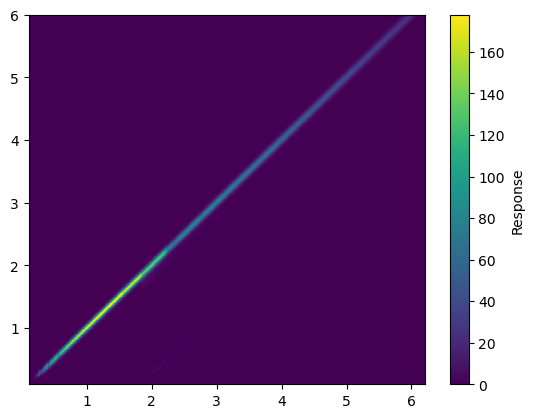

In [14]:
plt.pcolormesh(NICER2022.energy_edges, NICER2022.channel_edges, NICER2022.matrix)
plt.colorbar(label='Response') 

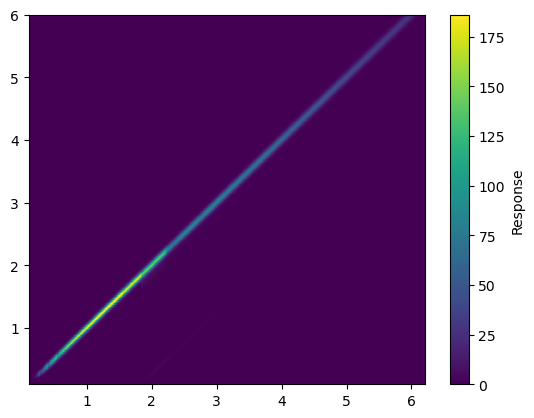

In [15]:
plt.pcolormesh(NICER2019.energy_edges, NICER2019.channel_edges, NICER2019.matrix)
plt.colorbar(label='Response') 

In [ ]:
fig, ax = plt.subplots()

ax.imshow(NICER2019.matrix, cmap='jet', aspect='auto')
ax.set_xlim([0,120])
ax.set_ylim([0,100])

In [18]:
NICER2019.channel_edges

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08,
       1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19,
       1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 ,
       1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41,
       1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52,
       1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.